# Exploring the Non-Colinear Lagrange Points

## Given:
The Earth-Moon System

## Find:
a) Linear variational equation relative to $L_4$. Find the roots $s_1$ and $s_2$. Assume you are eliminating either the long or short period. 
IC: $\xi = 0.01$ and $\eta = 0$. What are the corresponding $\dot{\xi}_0$ and $\dot{\eta}_0$

i) Plot it

ii) What is the period? What are the IC in demsional form?  What is the significance to period?

b) Select IC for the short  and long frequency. Plot orbit. Are your frequencies commensurate? What is the value of C?

c) Use IC for non-linear and compare with linear. Compare more instances with different $\xi_0$.

In [21]:
# Import Functions and basic infor
import sys
sys.path.append('../')
from Functions.Universe import Solar_3 as SS3
from Functions import Keplarian_fnc as kp
from Functions import Poincare_fnc as pn
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from datetime import timedelta

In [22]:
system = "Earth-Moon"
L4 = pn.L4_L5( SS3.loc[system,'miu'], np.array([.55, .5]), acc = 10**-8)

xi_0 = 0.01
eta_0 = 0
zeta_0 = 0

### Part a)

In [23]:
coeff = [1, 1, 27/4 * SS3.loc[system, 'miu']*(1 - SS3.loc[system, 'miu'])]
lamda = np.roots(coeff)
s = np.imag(np.lib.scimath.sqrt(lamda))
s_1 = min(s)
s_2 = max(s)

U_xx, U_yy, U_zz, U_xy, _, _ = pn.U_ii(L4[0,0], L4[1,0], 0, SS3.loc[system, 'miu'])

alpha_2 = (eta_0 *(s_1**2 + U_yy) + U_xy * xi_0)/2/s_1
beta_2  = (-xi_0 * (s_1**2 + U_xx) - U_xy * eta_0)/2/s_1

xi_dot_0 = alpha_2*s_1
eta_dot_0 = beta_2*s_1
zeta_dot_0 = 0

Per_L = 2*np.pi / s_1
Per_s = 2*np.pi / s_2

print("Long period root :", round(s_1,3))
print("Xi_dot_0 (km/s):", xi_dot_0 * SS3.loc[system, 'l*']/ SS3.loc[system, 't*'])
print("Eta_dot_0 (km/s):", eta_dot_0*SS3.loc[system, 'l*']/ SS3.loc[system, 't*'])
print("Period in days :", timedelta(seconds=2*np.pi/s_1*SS3.loc[system, 't*']) )
print("Long Period does not seem to have any significance")
print("Period in days :", timedelta(seconds=2*np.pi/s_2*SS3.loc[system, 't*']) )
print("Short period is similar to Moon's orbital period")


Long period root : 0.298
Xi_dot_0 (km/s): 0.0064929117923095735
Eta_dot_0 (km/s): -0.004297605853168451
Period in days : 91 days, 11:53:01.770481
Long Period does not seem to have any significance
Period in days : 28 days, 14:02:41.985398
Short period is similar to Moon's orbital period


The Jacobi constant is:  2.988


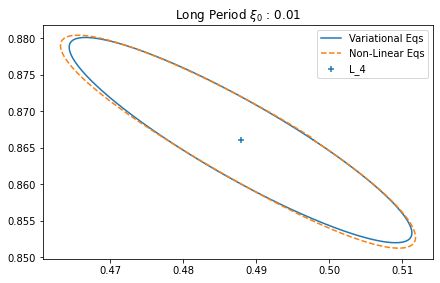

In [24]:
v = np.linalg.norm([xi_dot_0, eta_dot_0, zeta_dot_0])
C0 = pn.Jacobi_const(xi_0+L4[0,0], L4[1,0]+eta_0, 0, v, SS3.loc[system,'miu'])

t_span = [0, Per_L]
IC = np.append([xi_0, eta_0, zeta_0], [xi_dot_0, eta_dot_0, zeta_dot_0]) 
lin = solve_ivp(lambda t, x: pn.Lagrange_var_df(t, x, SS3.loc[system,'miu'], U_xx, U_yy, U_zz, U_xy), t_span , IC, method='RK45',
                rtol=10**-12, atol=10**-16)

IC = np.append([L4[0,0]+xi_0, L4[1,0]+eta_0, zeta_0], [xi_dot_0, eta_dot_0, zeta_dot_0]) 
non_lin = solve_ivp(lambda t, x: pn.cr3bp_df(t, x, SS3.loc[system,'miu']), t_span , IC, method='RK45',
                    rtol=10**-12, atol=10**-16)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
axs.scatter(L4[0],L4[1], marker="+", label = 'L_4')
axs.plot(lin.y[0,:]+L4[0], lin.y[1,:]+L4[1], label='Variational Eqs')
axs.plot(non_lin.y[0,:], non_lin.y[1,:], label='Non-Linear Eqs', linestyle='--')
axs.set_aspect('equal', 'box')
axs.set_title((r'Long Period $\xi_0$ : ' + str(xi_0)))
axs.legend()

print('The Jacobi constant is: ', round(C0,3))

### Part b)

The Jacobi constant is:  2.988


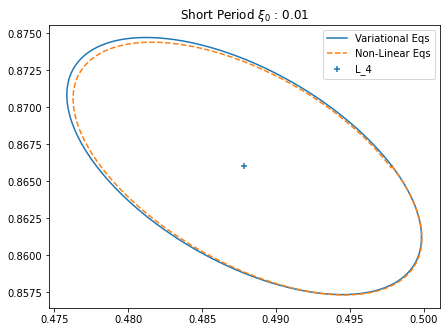

In [25]:
alpha_2 = (eta_0 *(s_2**2 + U_yy) + U_xy * xi_0)/2/s_2
beta_2  = (-xi_0 * (s_2**2 + U_xx) - U_xy * eta_0)/2/s_2

xi_dot_0 = alpha_2*s_2
eta_dot_0 = beta_2*s_2

v = np.linalg.norm([xi_dot_0, eta_dot_0, zeta_dot_0])

C0 = pn.Jacobi_const(xi_0+L4[0,0], L4[1,0]+eta_0, 0, v, SS3.loc[system,'miu'])


t_span = [0, Per_s]
IC = np.append([xi_0, eta_0, zeta_0], [xi_dot_0, eta_dot_0, zeta_dot_0]) 
lin = solve_ivp(lambda t, x: pn.Lagrange_var_df(t, x, SS3.loc[system,'miu'], U_xx, U_yy, U_zz, U_xy), t_span , IC, method='RK45',
                rtol=10**-12, atol=10**-16)

IC = np.append([L4[0,0]+xi_0, L4[1,0]+eta_0, zeta_0], [xi_dot_0, eta_dot_0, zeta_dot_0]) 
non_lin = solve_ivp(lambda t, x: pn.cr3bp_df(t, x, SS3.loc[system,'miu']), t_span , IC, method='RK45',
                    rtol=10**-12, atol=10**-16)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
axs.scatter(L4[0],L4[1], marker="+", label = 'L_4')
axs.plot(lin.y[0,:]+L4[0], lin.y[1,:]+L4[1], label='Variational Eqs')
axs.plot(non_lin.y[0,:], non_lin.y[1,:], label='Non-Linear Eqs', linestyle='--')
axs.set_aspect('equal', 'box')
axs.set_title((r'Short Period $\xi_0$ : ' + str(xi_0)))
axs.legend()

print('The Jacobi constant is: ', round(C0,3))

### Part c)

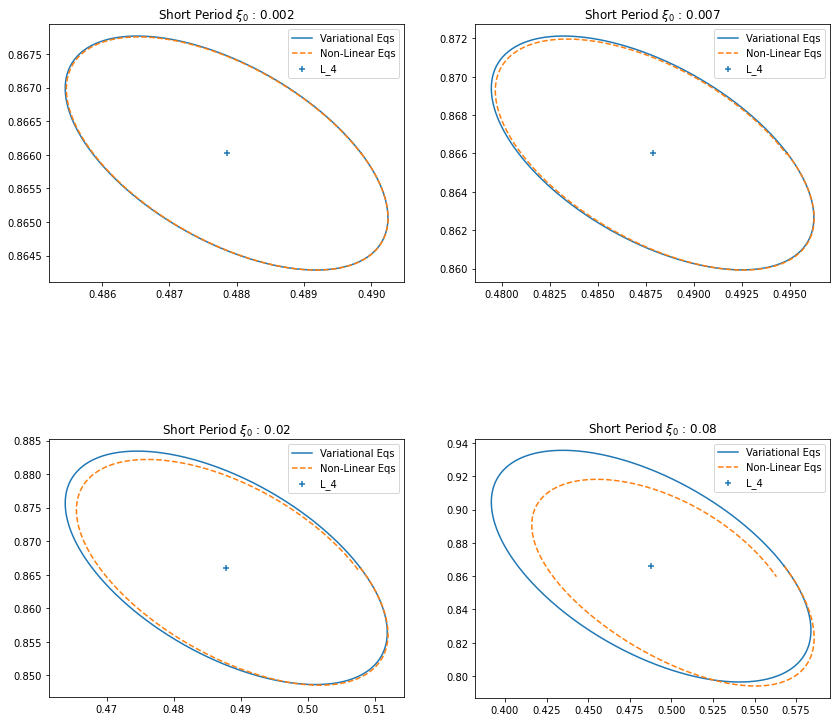

In [27]:
xi_0s = [0.002, 0.007, 0.02, 0.08]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14,14))
ax = axs.ravel()
t_span = [0, Per_s]

for i, xi_0 in enumerate(xi_0s):
    alpha_2 = (eta_0 *(s_2**2 + U_yy) + U_xy * xi_0)/2/s_2
    beta_2  = (-xi_0 * (s_2**2 + U_xx) - U_xy * eta_0)/2/s_2

    xi_dot_0 = alpha_2*s_2
    eta_dot_0 = beta_2*s_2

    IC = np.append([xi_0, eta_0, zeta_0], [xi_dot_0, eta_dot_0, zeta_dot_0]) 
    lin = solve_ivp(lambda t, x: pn.Lagrange_var_df(t, x, SS3.loc[system,'miu'], U_xx, U_yy, U_zz, U_xy), t_span , IC, method='RK45',
                    rtol=10**-12, atol=10**-16)

    IC = np.append([L4[0,0]+xi_0, L4[1,0]+eta_0, zeta_0], [xi_dot_0, eta_dot_0, zeta_dot_0]) 
    non_lin = solve_ivp(lambda t, x: pn.cr3bp_df(t, x, SS3.loc[system,'miu']), t_span , IC, method='RK45',
                        rtol=10**-12, atol=10**-16)

    ax[i].scatter(L4[0],L4[1], marker="+", label = 'L_4')
    ax[i].plot(lin.y[0,:]+L4[0], lin.y[1,:]+L4[1], label='Variational Eqs')
    ax[i].plot(non_lin.y[0,:], non_lin.y[1,:], label='Non-Linear Eqs', linestyle='--')
    ax[i].set_aspect('equal', 'box')
    ax[i].set_title((r'Short Period $\xi_0$ : ' + str(xi_0)))
    ax[i].legend()

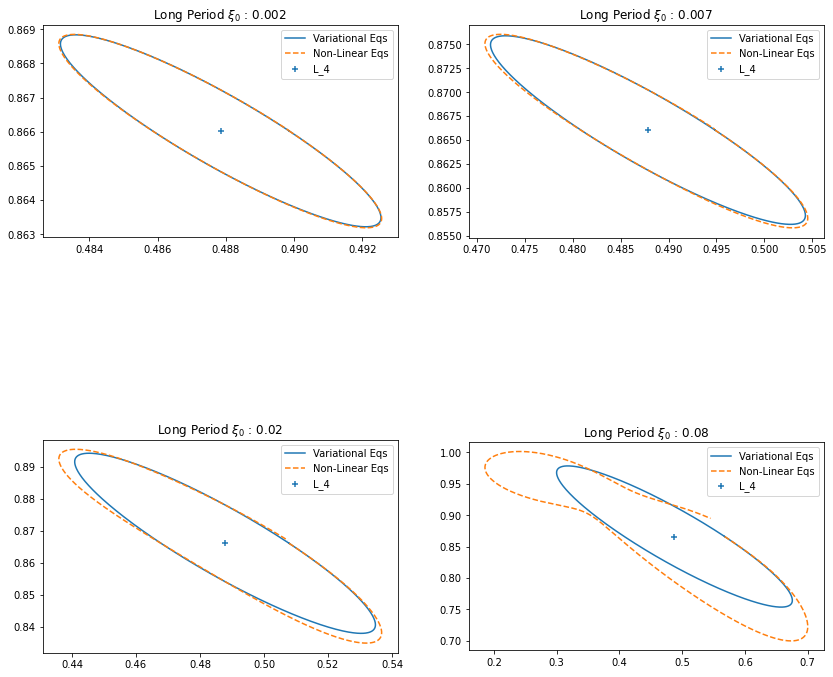

In [36]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14,14))
ax = axs.ravel()
t_span = [0, Per_L]


for i, xi_0 in enumerate(xi_0s):
    alpha_2 = (eta_0 *(s_1**2 + U_yy) + U_xy * xi_0)/2/s_1
    beta_2  = (-xi_0 * (s_1**2 + U_xx) - U_xy * eta_0)/2/s_1

    xi_dot_0 = alpha_2*s_1
    eta_dot_0 = beta_2*s_1

    IC = np.append([xi_0, eta_0, zeta_0], [xi_dot_0, eta_dot_0, zeta_dot_0]) 
    lin = solve_ivp(lambda t, x: pn.Lagrange_var_df(t, x, SS3.loc[system,'miu'], U_xx, U_yy, U_zz, U_xy), t_span , IC, method='RK45',
                    rtol=10**-12, atol=10**-16)

    IC = np.append([L4[0,0]+xi_0, L4[1,0]+eta_0, zeta_0], [xi_dot_0, eta_dot_0, zeta_dot_0]) 
    non_lin = solve_ivp(lambda t, x: pn.cr3bp_df(t, x, SS3.loc[system,'miu']), t_span , IC, method='RK45',
                        rtol=10**-12, atol=10**-16)

    ax[i].scatter(L4[0],L4[1], marker="+", label = 'L_4')
    ax[i].plot(lin.y[0,:]+L4[0], lin.y[1,:]+L4[1], label='Variational Eqs')
    ax[i].plot(non_lin.y[0,:], non_lin.y[1,:], label='Non-Linear Eqs', linestyle='--')
    ax[i].set_aspect('equal', 'box')
    ax[i].set_title((r'Long Period $\xi_0$ : ' + str(xi_0)))
    ax[i].legend()